# Using `mypackage.linearmap`

### Importing

In [2]:
from sys import path
from os.path import abspath

# Tell python to search for the files and modules starting from the working directory
module_path = abspath("..")
if module_path not in path:
    path.append(module_path)

*Note: If we don't want to be telling Python where to search for our library, we can install it (in editable mode) in our conda environment using*
```console
pip install -e .
```

In [3]:
import numpy as np

from mypackage import Vector, LinearMap, Rotation, Shear

To make plots, we import matplotlib and adjust the style

In [4]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-whitegrid")

/var/folders/fg/9xcyj6451md237pczr54fr6c0000gn/T/ipykernel_27868/1055582722.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


## Transforming vectors

As a first example, we will see what happens if we try to initialize the abstract class `LinearMap`

In [5]:
matrix = [[1, 0], [1, 2]]
matrix_map = LinearMap(matrix)

TypeError: Can't instantiate abstract class LinearMap with abstract method _get_inverse

As we can see, since the method `_get_inverse()` is not defined, the class cannot be instantiated.

On the contrary, there is no problem initializing a `Rotation` object:

In [9]:
angle = np.pi / 4
rotation = Rotation(angle)

We can see what happens if we apply this rotation and its inverse to a vector

In [10]:
vector = Vector(1, 1)
rot_vector = rotation(vector)
inv_rot_vector = rotation.inverse(vector)

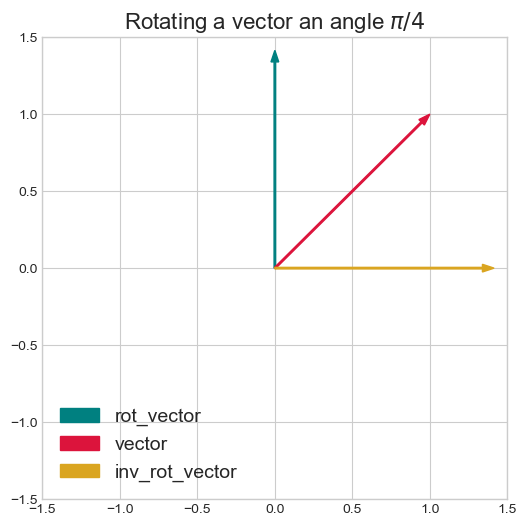

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
arrow_kwargs = {
    "width": 0.01,
    "head_width": 0.05,
    "length_includes_head": True,
}
ax.arrow(0, 0, rot_vector.x, rot_vector.y, color="teal", label="rot_vector", **arrow_kwargs)
ax.arrow(0, 0, vector.x, vector.y, color="crimson", label="vector", **arrow_kwargs)
ax.arrow(
    0,
    0,
    inv_rot_vector.x,
    inv_rot_vector.y,
    color="goldenrod",
    label="inv_rot_vector",
    **arrow_kwargs,
)

ax.legend(loc="lower left", fontsize=14)
ax.set_title(r"Rotating a vector an angle $\pi/4$", fontsize=16)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

plt.show()

In a similar fashion, we can apply a shear transformation and its inverse to a vector

In [12]:
angle = np.pi / 4
shear_map = Shear(angle)

vector = Vector(1, 1)
shear_vector = shear_map(vector)
inv_shear_vector = shear_map.inverse(vector)

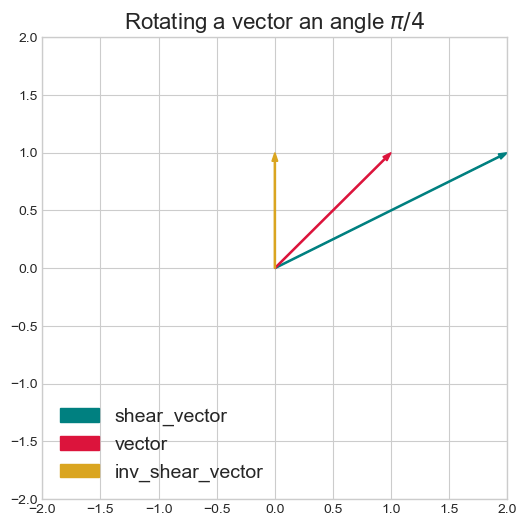

In [13]:
fig, ax = plt.subplots(figsize=(6, 6))
arrow_kwargs = {
    "width": 0.01,
    "head_width": 0.05,
    "length_includes_head": True,
}
ax.arrow(0, 0, shear_vector.x, shear_vector.y, color="teal", label="shear_vector", **arrow_kwargs)
ax.arrow(0, 0, vector.x, vector.y, color="crimson", label="vector", **arrow_kwargs)
ax.arrow(
    0,
    0,
    inv_shear_vector.x,
    inv_shear_vector.y,
    color="goldenrod",
    label="inv_shear_vector",
    **arrow_kwargs,
)

ax.legend(loc="lower left", fontsize=14)
ax.set_title(r"Rotating a vector an angle $\pi/4$", fontsize=16)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

plt.show()